In [1]:
!pip install xgboost
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import optuna
import warnings
warnings.filterwarnings('ignore')
from skimpy import skim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as pe
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


/home/uniqueusman/Smoker-Status-Prediction/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_df = pd.read_csv("train_dataset.csv")
test_df = pd.read_csv("test_dataset.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16708 entries, 0 to 16707
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  16708 non-null  int64  
 1   height(cm)           16708 non-null  int64  
 2   weight(kg)           16708 non-null  int64  
 3   waist(cm)            16708 non-null  float64
 4   eyesight(left)       16708 non-null  float64
 5   eyesight(right)      16708 non-null  float64
 6   hearing(left)        16708 non-null  int64  
 7   hearing(right)       16708 non-null  int64  
 8   systolic             16708 non-null  int64  
 9   relaxation           16708 non-null  int64  
 10  fasting blood sugar  16708 non-null  int64  
 11  Cholesterol          16708 non-null  int64  
 12  triglyceride         16708 non-null  int64  
 13  HDL                  16708 non-null  int64  
 14  LDL                  16708 non-null  int64  
 15  hemoglobin           16708 non-null 

In [6]:
len(train_df.columns)

23

In [7]:
# Checking null values in train and test data
print("-"*50)
print("Null Values in Train Dataset:")
print(train_df.isnull().sum())
print("-"*50)
print("Null Values in Test Dataset:")
print(test_df.isnull().sum())
print("-"*50)

--------------------------------------------------
Null Values in Train Dataset:
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64
--------------------------------------------------
Null Values in Test Dataset:
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
f

In [8]:
# Checking duplicate values in train and test data
print("-"*50)
print("Duplicate Values in Train Dataset:")
print(train_df.duplicated().sum())
print("-"*50)
print("Duplicate Values in Test Dataset:")
print(test_df.duplicated().sum())
print("-"*50)

--------------------------------------------------
Duplicate Values in Train Dataset:
5517
--------------------------------------------------
Duplicate Values in Test Dataset:
998
--------------------------------------------------


In [9]:
train_df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [10]:
# dropping duplicate. 
train_df.loc[train_df.duplicated(keep = False)]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
1       20         175         110      110.0             0.7   
2       45         155          65       86.0             0.9   
4       20         165          60       81.0             1.5   
5       60         160          50       78.0             1.0   
8       40         170          60       74.0             1.2   
...    ...         ...         ...        ...             ...   
38966   45         160          65       89.2             1.0   
38968   60         170          70       86.0             1.5   
38974   30         170          65       72.0             1.2   
38975   30         180          75       85.0             1.5   
38981   40         170         105      124.0             0.6   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
1                  0.9              1               1       119          79   
2                  0.9              1               1       110          80   
4                  0.1              1               1       109          64   
5                  0.9              2               2       126          75   
8                  1.5              1               1        89          57   
...                ...            ...             ...       ...         ...   
38966              0.5              1               1       110          77   
38968              1.5              1               1       135          85   
38974              1.0              1               1       111          77   
38975              1.2              1               1       123          71   
38981              0.5              1               1       141          85   

       ...  HDL  LDL  hemoglobin  Urine protein  serum creatinine   AST   ALT  \
1      ...   71  114        15.9              1               1.1    19    25   
2      ...   57  112        13.7              3               0.6  1090  1400   
4      ...   47   92        14.9              1               1.2    26    28   
5      ...   98   64        13.9              1               1.0    47    23   
8      ...   60  104        12.9              2               0.7    17    17   
...    ...  ...  ...         ...            ...               ...   ...   ...   
38966  ...   57  140        13.6              1               0.8    20    15   
38968  ...   55   90        14.9              1               1.0    56    85   
38974  ...   51  100        14.4              1               0.8    22    28   
38975  ...   67  107        16.2              1               0.8    23    24   
38981  ...   48  138        17.1              1               0.8    24    23   

       Gtp  dental caries  smoking  
1       30              1        0  
2      276              0        0  
4       15              0        0  
5       70              0        1  
8       14              0        0  
...    ...            ...      ...  
38966   22              0        0  
38968   32              1        0  
38974   43              1        1  
38975   33              0        1  
38981   35              1        1  

[11034 rows x 23 columns]

In [11]:
for col in train_df.columns:
    print("-"*50)
    val = train_df[col].value_counts().reset_index()
    if len(val) > 5:
        print(val[:5])
    else:
         print(val)

--------------------------------------------------
   age  count
0   40  10667
1   45   4946
2   60   4262
3   50   3901
4   55   3451
--------------------------------------------------
   height(cm)  count
0         170   7985
1         165   7004
2         160   6236
3         175   5617
4         155   5292
--------------------------------------------------
   weight(kg)  count
0          65   5733
1          60   5671
2          70   5413
3          55   5120
4          75   4241
--------------------------------------------------
   waist(cm)  count
0       80.0   1350
1       82.0   1260
2       81.0   1227
3       84.0   1200
4       78.0   1153
--------------------------------------------------
   eyesight(left)  count
0             1.2   8880
1             1.0   8615
2             1.5   5524
3             0.8   3594
4             0.9   3591
--------------------------------------------------
   eyesight(right)  count
0              1.2   8819
1              1.0   8730
2         

In [12]:
# Value counts in test data
for col in test_df.columns:
    print("-"*50)
    val = test_df[col].value_counts().reset_index()
    if len(val) > 5:
        print(val[:5])
    else:
         print(val)

--------------------------------------------------
   age  count
0   40   4514
1   45   2091
2   60   1905
3   50   1648
4   55   1569
--------------------------------------------------
   height(cm)  count
0         170   3396
1         165   2945
2         160   2683
3         175   2392
4         155   2335
--------------------------------------------------
   weight(kg)  count
0          60   2468
1          65   2463
2          70   2309
3          55   2206
4          75   1847
--------------------------------------------------
   waist(cm)  count
0       80.0    567
1       82.0    515
2       78.0    514
3       81.0    510
4       85.0    502
--------------------------------------------------
   eyesight(left)  count
0             1.2   3866
1             1.0   3602
2             1.5   2301
3             0.8   1673
4             0.9   1534
--------------------------------------------------
   eyesight(right)  count
0              1.0   3768
1              1.2   3720
2         

In [13]:
# EXPLORATORY DATA ANALYSIS

In [14]:
train_stat_summ = train_df.describe(include='all').T.reset_index()
train_stat_summ

index    count        mean        std    min    25%    50%  \
0                   age  38984.0   44.127591  12.063564   20.0   40.0   40.0   
1            height(cm)  38984.0  164.689488   9.187507  130.0  160.0  165.0   
2            weight(kg)  38984.0   65.938718  12.896581   30.0   55.0   65.0   
3             waist(cm)  38984.0   82.062115   9.326798   51.0   76.0   82.0   
4        eyesight(left)  38984.0    1.014955   0.498527    0.1    0.8    1.0   
5       eyesight(right)  38984.0    1.008768   0.493813    0.1    0.8    1.0   
6         hearing(left)  38984.0    1.025369   0.157246    1.0    1.0    1.0   
7        hearing(right)  38984.0    1.026190   0.159703    1.0    1.0    1.0   
8              systolic  38984.0  121.475631  13.643521   71.0  112.0  120.0   
9            relaxation  38984.0   75.994408   9.658734   40.0   70.0   76.0   
10  fasting blood sugar  38984.0   99.342269  20.642741   46.0   89.0   96.0   
11          Cholesterol  38984.0  196.883491  36.353945   55.0  172.0  195.0   
12         triglyceride  38984.0  126.749461  71.803143    8.0   74.0  108.0   
13                  HDL  38984.0   57.293146  14.617822    4.0   47.0   55.0   
14                  LDL  38984.0  115.081495  42.883163    1.0   91.0  113.0   
15           hemoglobin  38984.0   14.624264   1.566528    4.9   13.6   14.8   
16        Urine protein  38984.0    1.086523   0.402107    1.0    1.0    1.0   
17     serum creatinine  38984.0    0.886030   0.220621    0.1    0.8    0.9   
18                  AST  38984.0   26.198235  19.175595    6.0   19.0   23.0   
19                  ALT  38984.0   27.145188  31.309945    1.0   15.0   21.0   
20                  Gtp  38984.0   39.905038  49.693843    2.0   17.0   26.0   
21        dental caries  38984.0    0.214421   0.410426    0.0    0.0    0.0   
22              smoking  38984.0    0.367279   0.482070    0.0    0.0    0.0   

      75%     max  
0    55.0    85.0  
1   170.0   190.0  
2    75.0   135.0  
3    88.0   129.0  
4     1.2     9.9  
5     1.2     9.9  
6     1.0     2.0  
7     1.0     2.0  
8   130.0   233.0  
9    82.0   146.0  
10  104.0   423.0  
11  219.0   445.0  
12  160.0   999.0  
13   66.0   359.0  
14  136.0  1860.0  
15   15.8    21.1  
16    1.0     6.0  
17    1.0    11.6  
18   29.0  1090.0  
19   31.0  2914.0  
20   44.0   999.0  
21    0.0     1.0  
22    1.0     1.0

In [15]:
test_stat_summ = test_df.describe(include='all').T.reset_index()
test_stat_summ

index    count        mean        std    min    25%    50%  \
0                   age  16708.0   44.312006  12.089099   20.0   40.0   40.0   
1            height(cm)  16708.0  164.555602   9.210712  135.0  160.0  165.0   
2            weight(kg)  16708.0   65.692782  12.639255   30.0   55.0   65.0   
3             waist(cm)  16708.0   82.009792   9.150549   53.0   76.0   82.0   
4        eyesight(left)  16708.0    1.007182   0.458500    0.1    0.8    1.0   
5       eyesight(right)  16708.0    1.004351   0.467140    0.1    0.8    1.0   
6         hearing(left)  16708.0    1.026095   0.159423    1.0    1.0    1.0   
7        hearing(right)  16708.0    1.026035   0.159245    1.0    1.0    1.0   
8              systolic  16708.0  121.537587  13.751759   79.0  112.0  120.0   
9            relaxation  16708.0   76.029148   9.727289   40.0   70.0   76.0   
10  fasting blood sugar  16708.0   99.242459  21.148392   55.0   89.0   96.0   
11          Cholesterol  16708.0  196.943261  36.167982   72.0  172.0  195.0   
12         triglyceride  16708.0  126.470254  71.259041   16.0   74.0  107.0   
13                  HDL  16708.0   57.283816  15.018255    4.0   47.0   55.0   
14                  LDL  16708.0  114.691525  35.948974    1.0   92.0  113.0   
15           hemoglobin  16708.0   14.618692   1.559794    4.9   13.6   14.8   
16        Urine protein  16708.0    1.088820   0.411293    1.0    1.0    1.0   
17     serum creatinine  16708.0    0.885055   0.223621    0.1    0.8    0.9   
18                  AST  16708.0   26.147235  19.769301    6.0   19.0   23.0   
19                  ALT  16708.0   26.781362  30.085442    1.0   15.0   21.0   
20                  Gtp  16708.0   40.062246  51.657330    1.0   17.0   25.0   
21        dental caries  16708.0    0.210797   0.407887    0.0    0.0    0.0   

      75%     max  
0    55.0    85.0  
1   170.0   190.0  
2    75.0   125.0  
3    88.0   125.8  
4     1.2     9.9  
5     1.2     9.9  
6     1.0     2.0  
7     1.0     2.0  
8   130.0   240.0  
9    82.0   140.0  
10  103.0   505.0  
11  220.0   371.0  
12  160.0   405.0  
13   66.0   618.0  
14  136.0  1660.0  
15   15.8    20.9  
16    1.0     6.0  
17    1.0    10.3  
18   28.0  1311.0  
19   30.0  2062.0  
20   43.0   999.0  
21    0.0     1.0

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

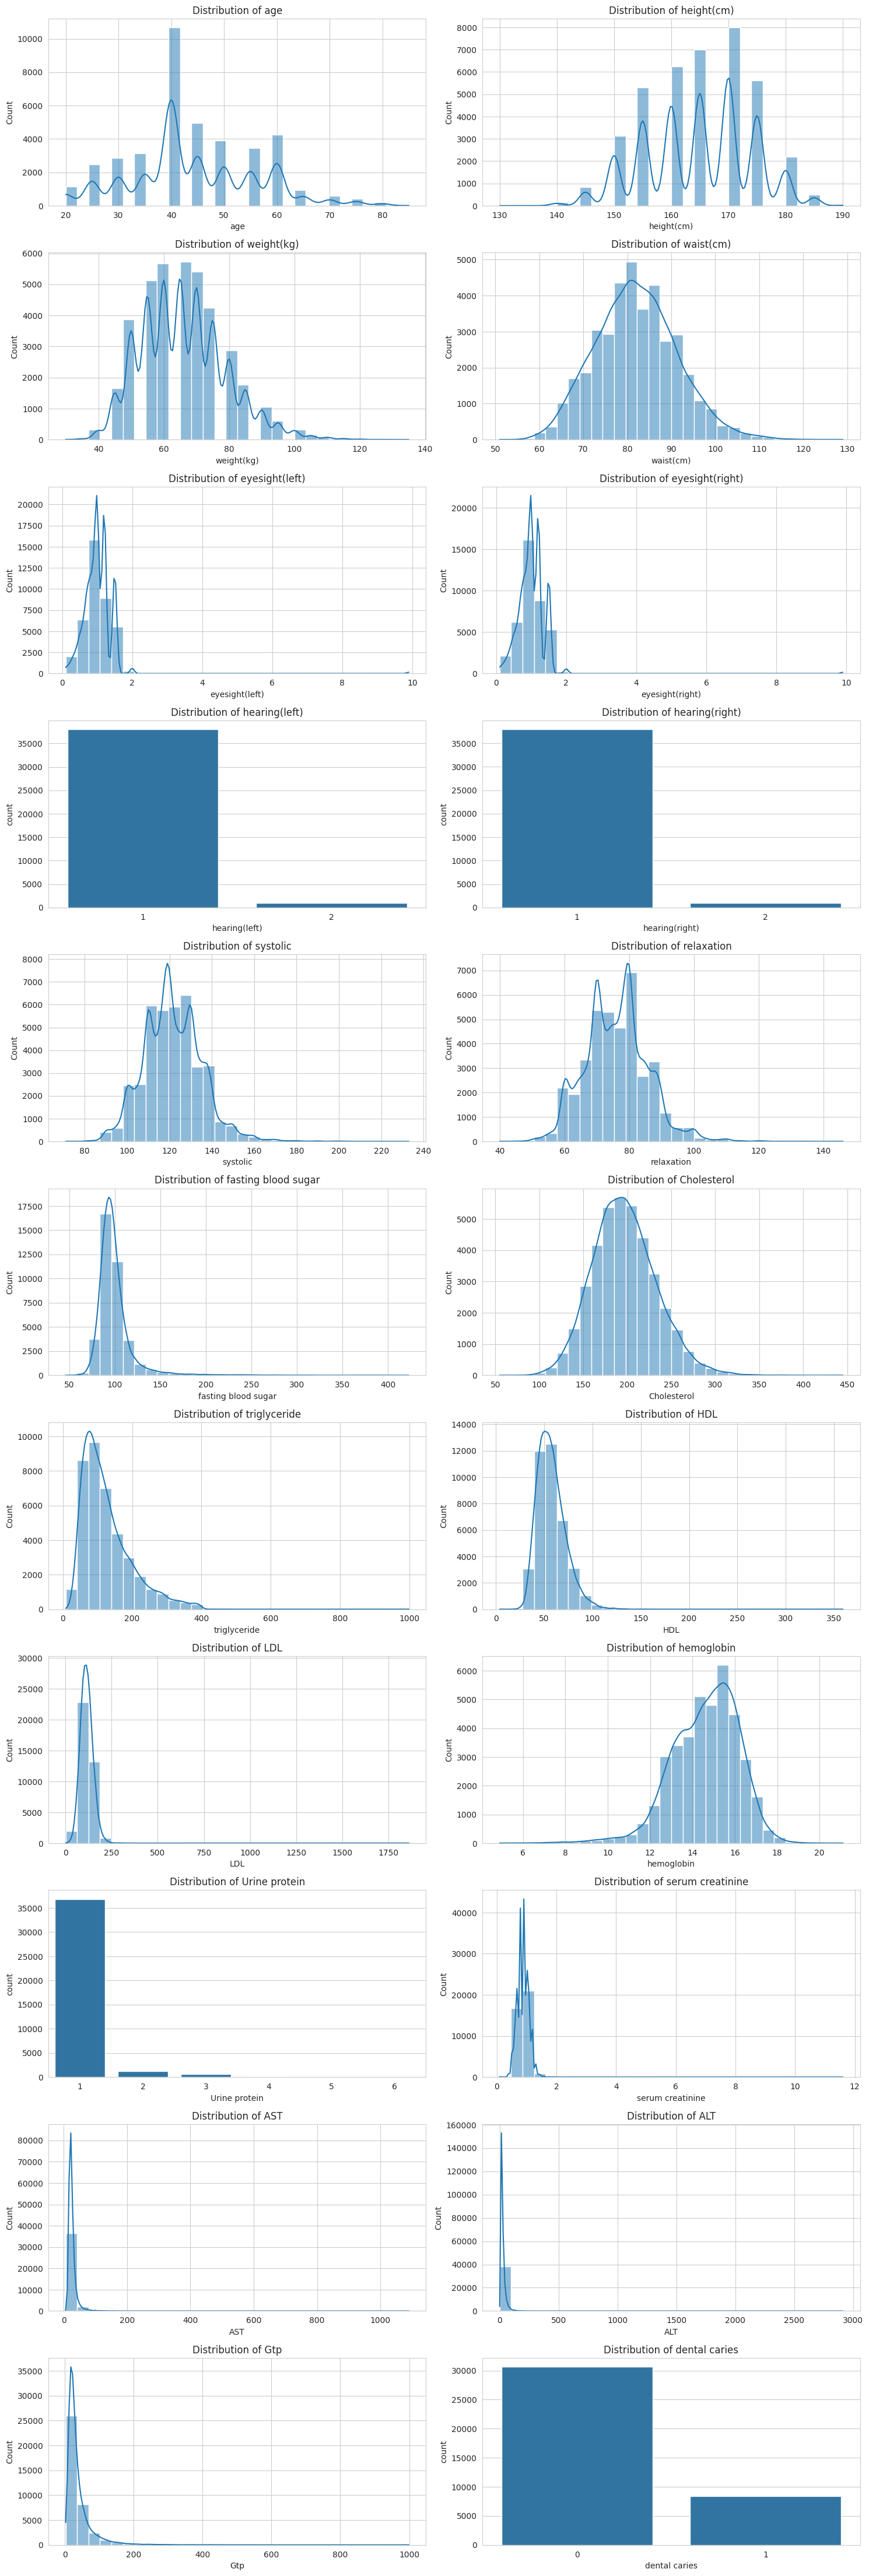

In [17]:
# Let's show the distribution of dataset variables

sns.set_style('whitegrid')

# List of column names to plot
columns_to_plot = train_df.columns.drop(['smoking'])

num_rows = len(columns_to_plot)
plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 2, i)
    
    if train_df[column].nunique() <= 10:
        sns.countplot(x=column, data=train_df)
    else:
        sns.histplot(train_df[column], kde=True, bins=30)
        
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    
plt.show()

In [18]:
# Box Plot

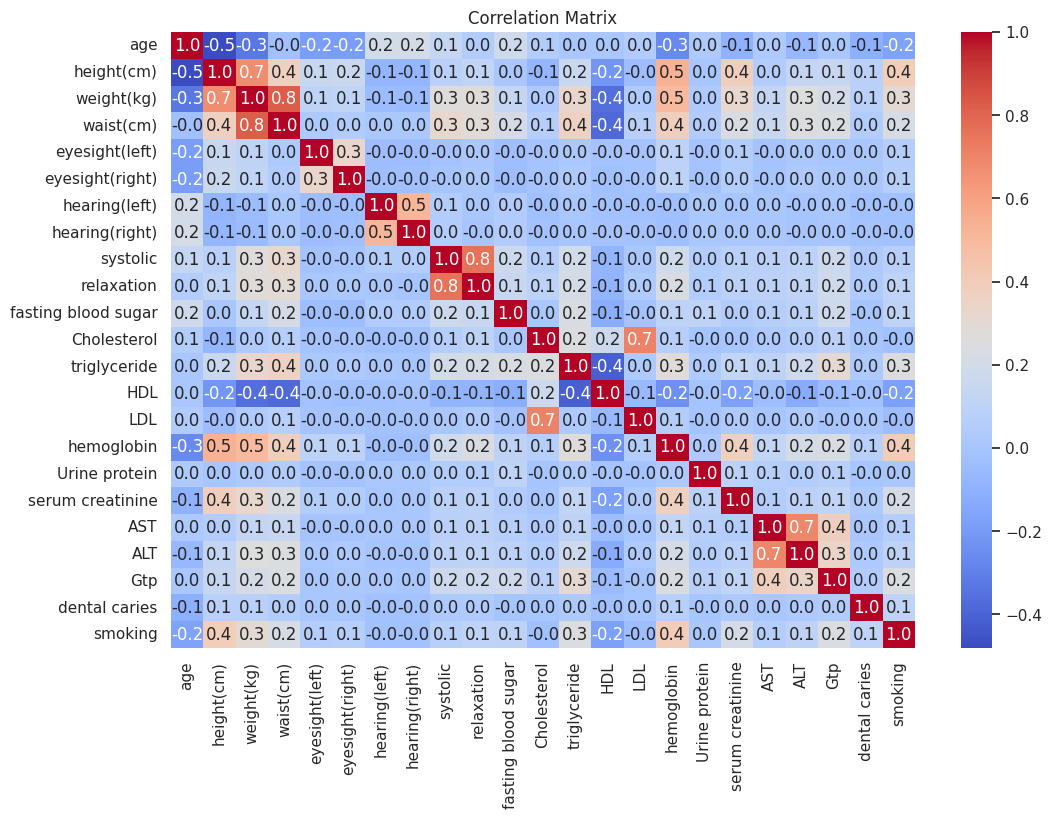

In [19]:
sns.set(style="whitegrid")
def plot_correlation_heatmap(dataframe):
    plt.figure(figsize=(12, 8))
    corr_matrix = dataframe.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_heatmap(train_df)

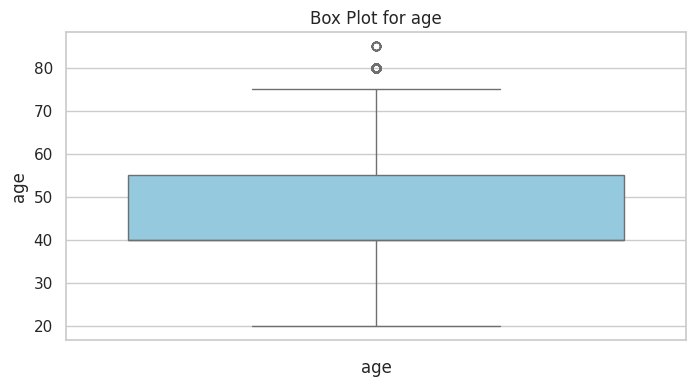

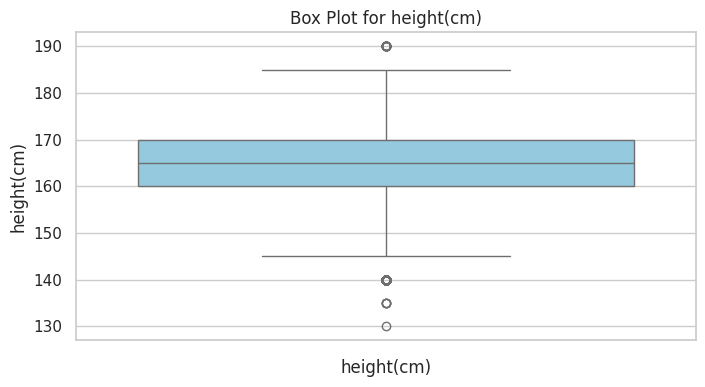

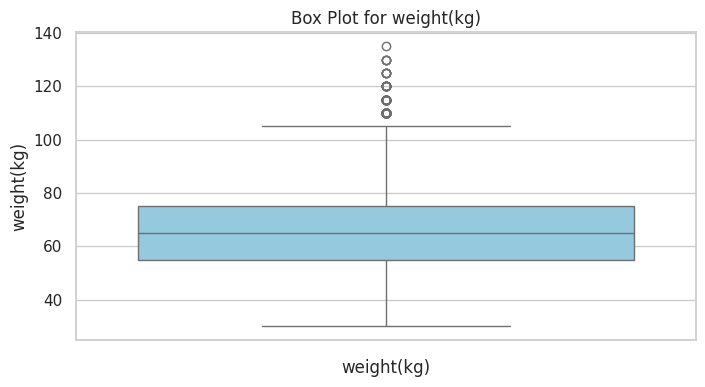

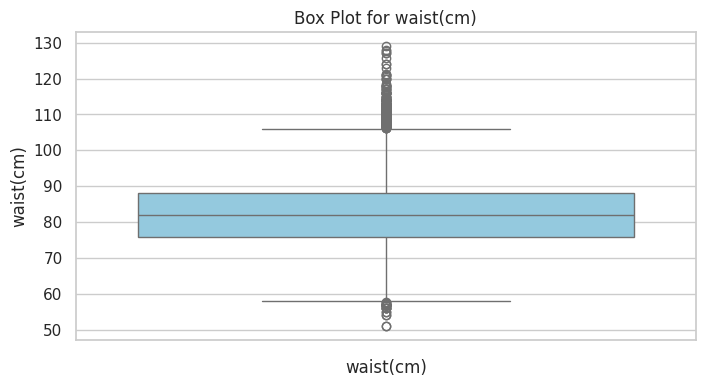

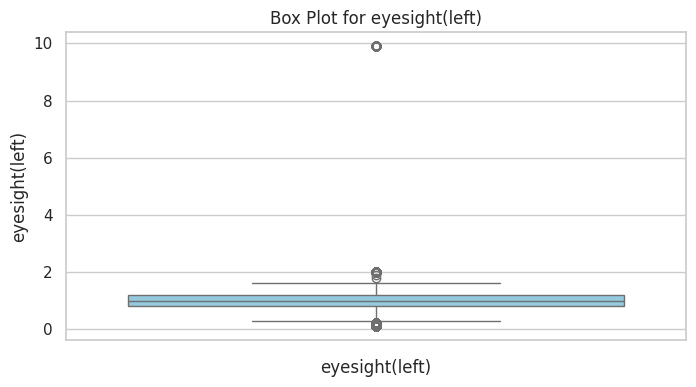

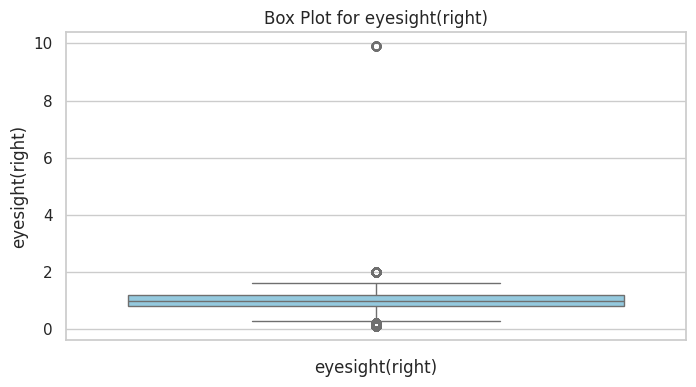

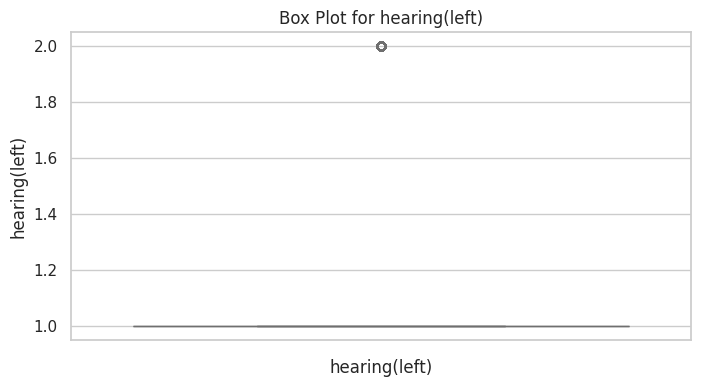

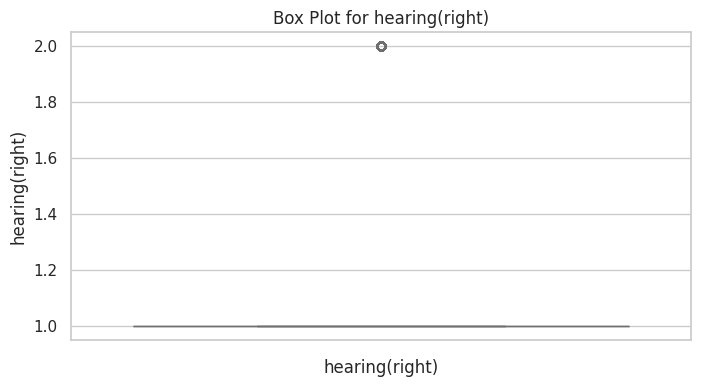

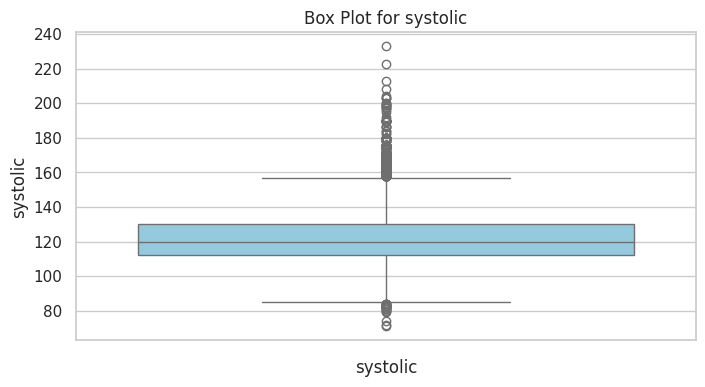

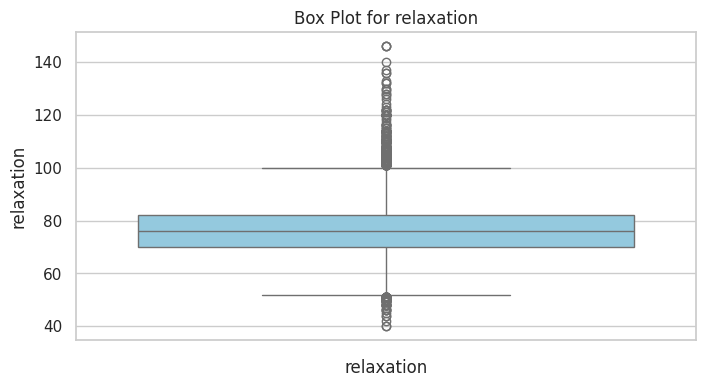

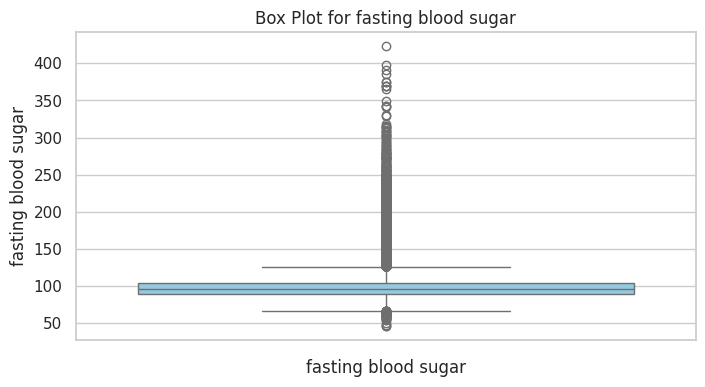

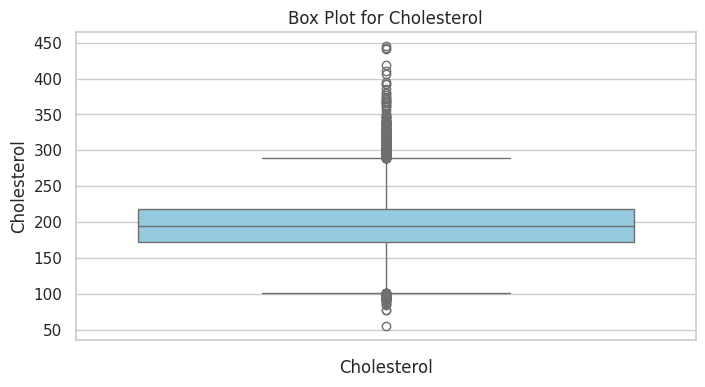

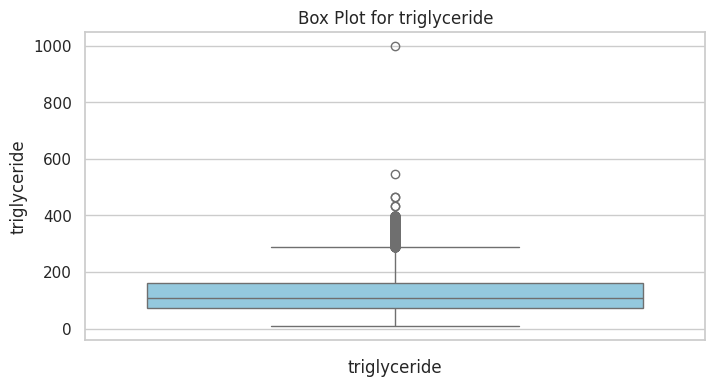

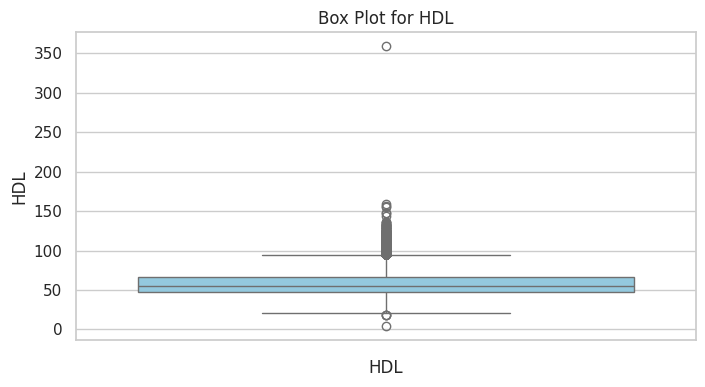

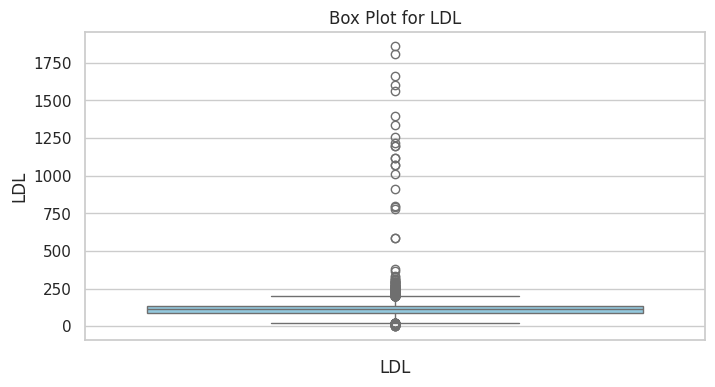

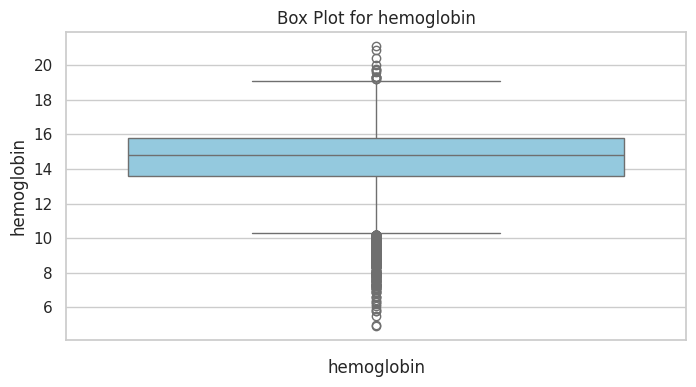

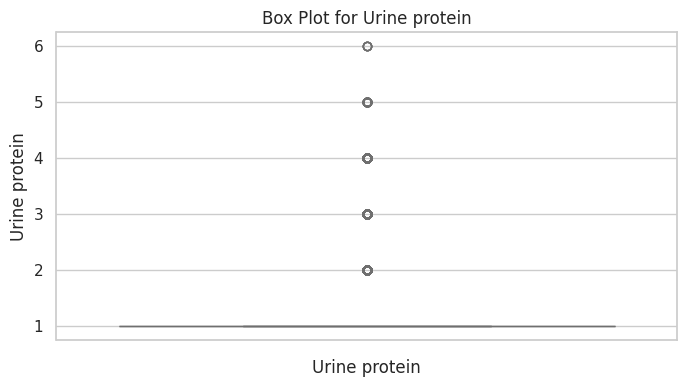

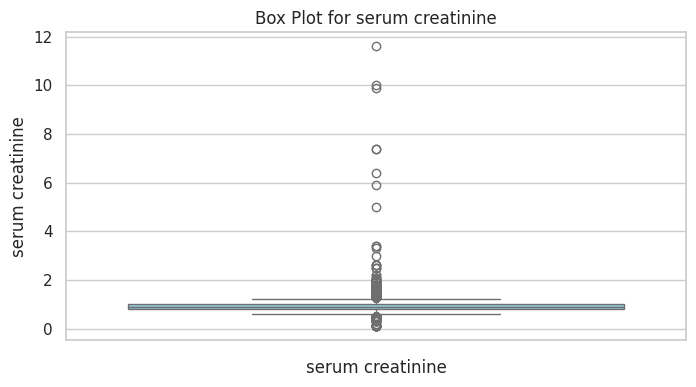

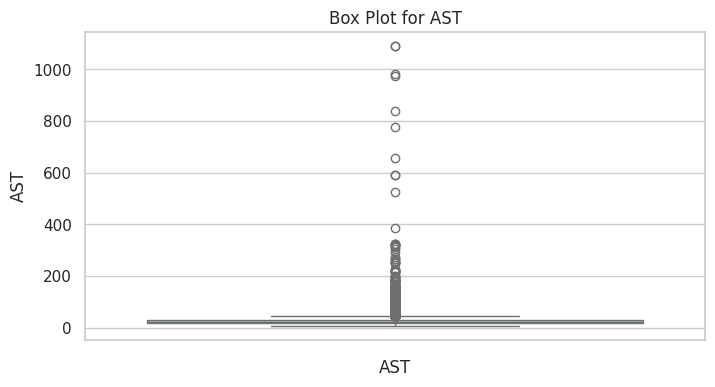

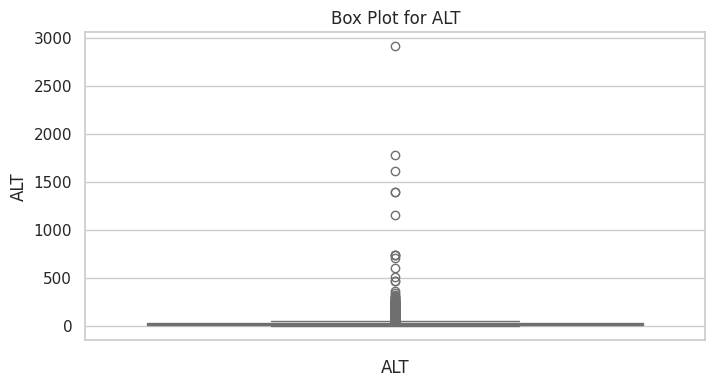

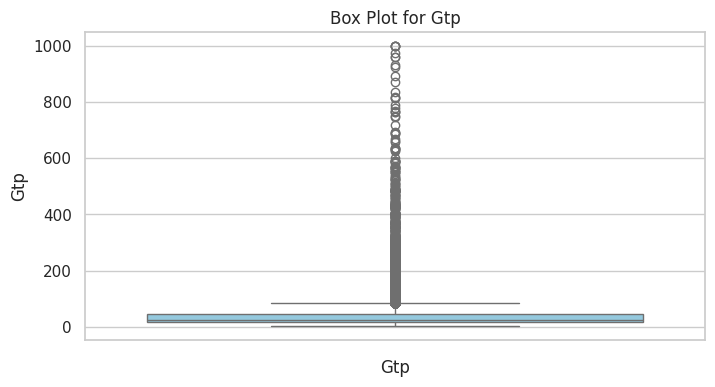

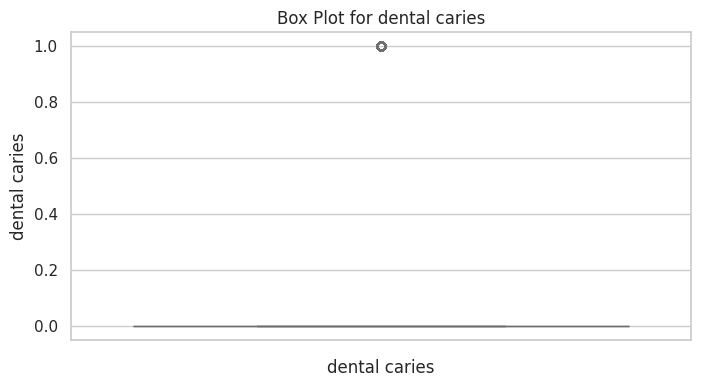

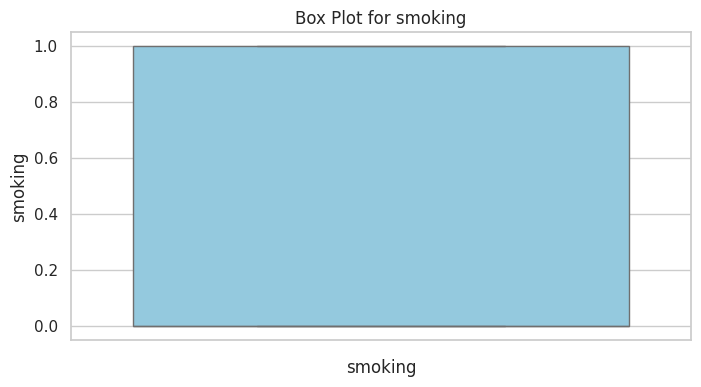

In [20]:

#Set the style of seaborn
sns.set(style="whitegrid")

# Plot boxplots for all columns
for column in train_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df[column], color='skyblue')
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)
plt.show()

In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

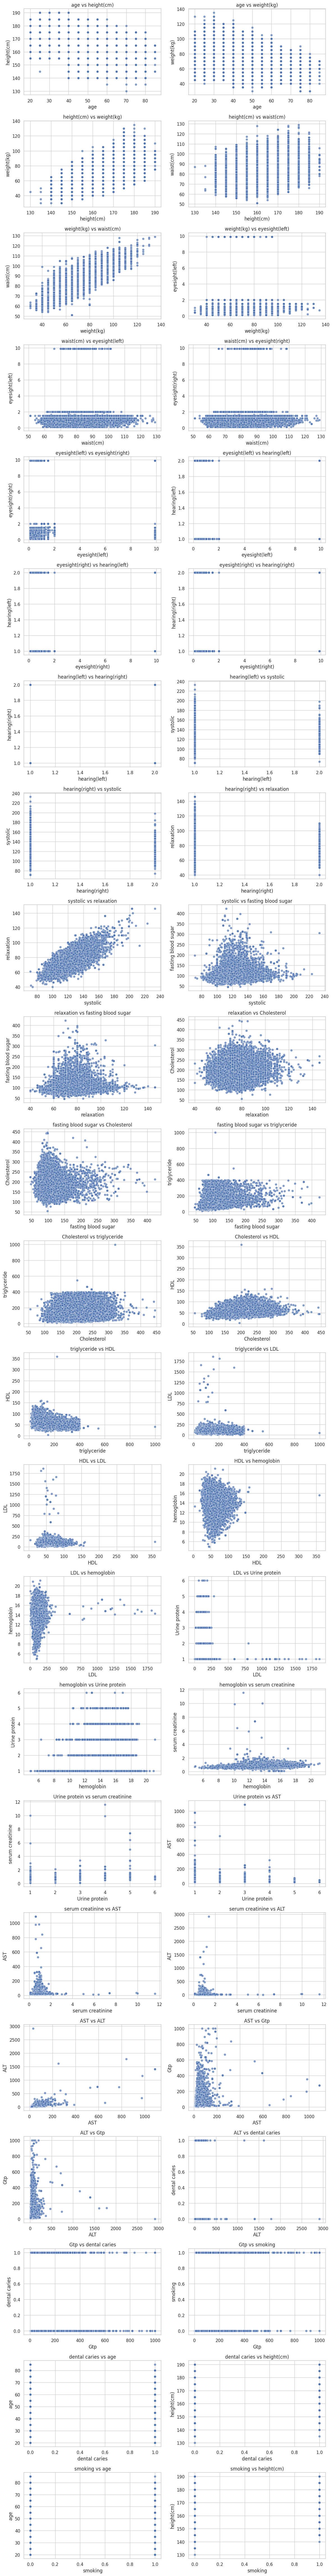

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking']

# Create a figure with 2 columns
fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(12, 4*len(columns_to_plot)))

for i, column_x in enumerate(columns_to_plot):
    # Select two other columns to compare against
    comparison_columns = columns_to_plot[i+1:i+3] if i+3 <= len(columns_to_plot) else columns_to_plot[0:2]
    
    for j, column_y in enumerate(comparison_columns):
        sns.scatterplot(x=column_x, y=column_y, data=train_df, alpha=0.7, ax=axes[i, j])
        axes[i, j].set_title(f"{column_x} vs {column_y}")

plt.tight_layout()
plt.show()

In [23]:
train_df.columns


Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [24]:
# NORMALIZATION AND STANDARDIZATION

In [25]:
scaler = MinMaxScaler()
train_data = train_df.copy()
num_cols_specific = train_df.drop(columns=['smoking']).columns
train_data[num_cols_specific] = scaler.fit_transform(train_data[num_cols_specific])
train_data.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  0.230769    0.666667    0.523810   0.589744        0.081633   
1  0.000000    0.750000    0.761905   0.756410        0.061224   
2  0.384615    0.416667    0.333333   0.448718        0.081633   
3  0.384615    0.583333    0.476190   0.551282        0.071429   
4  0.000000    0.583333    0.285714   0.384615        0.142857   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  ...  \
0         0.081633            0.0             0.0  0.290123    0.358491  ...   
1         0.081633            0.0             0.0  0.296296    0.367925  ...   
2         0.081633            0.0             0.0  0.240741    0.377358  ...   
3         0.061224            0.0             0.0  0.537037    0.452830  ...   
4         0.000000            0.0             0.0  0.234568    0.226415  ...   

        HDL       LDL  hemoglobin  Urine protein  serum creatinine       AST  \
0  0.185915  0.075847    0.919753            0.0          0.078261  0.050738   
1  0.188732  0.060785    0.679012            0.0          0.086957  0.011993   
2  0.149296  0.059710    0.543210            0.4          0.043478  1.000000   
3  0.118310  0.048413    0.740741            0.0          0.069565  0.023985   
4  0.121127  0.048951    0.617284            0.0          0.095652  0.018450   

        ALT       Gtp  dental caries  smoking  
0  0.039135  0.123370            1.0        1  
1  0.008239  0.028084            1.0        0  
2  0.480261  0.274824            0.0        0  
3  0.012015  0.034102            0.0        0  
4  0.009269  0.013039            0.0        0  

[5 rows x 23 columns]

In [26]:
scaler = MinMaxScaler()
test_data = test_df.copy()
test_data[num_cols_specific] = scaler.fit_transform(test_data[num_cols_specific])
test_data.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  0.307692    0.636364    0.368421   0.303571        0.091837   
1  0.384615    0.636364    0.473684   0.494505        0.061224   
2  0.153846    0.818182    0.631579   0.563187        0.091837   
3  0.615385    0.636364    0.210526   0.274725        0.040816   
4  0.153846    0.636364    0.368421   0.343407        0.142857   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  ...  \
0         0.081633            0.0             0.0  0.254658        0.30  ...   
1         0.112245            0.0             0.0  0.130435        0.27  ...   
2         0.071429            0.0             0.0  0.223602        0.32  ...   
3         0.061224            0.0             0.0  0.242236        0.38  ...   
4         0.091837            0.0             0.0  0.192547        0.30  ...   

   triglyceride       HDL       LDL  hemoglobin  Urine protein  \
0      0.627249  0.060261  0.078963      0.6750            0.0   
1      0.845758  0.073290  0.083785      0.6750            0.0   
2      0.223650  0.079805  0.061483      0.5375            0.0   
3      0.138817  0.099349  0.064497      0.5750            0.0   
4      0.498715  0.066775  0.061483      0.6125            0.0   

   serum creatinine       AST       ALT       Gtp  dental caries  
0          0.068627  0.013793  0.012130  0.031062            0.0  
1          0.098039  0.015326  0.013100  0.137275            0.0  
2          0.088235  0.009962  0.013586  0.029058            0.0  
3          0.117647  0.019157  0.013100  0.032064            0.0  
4          0.068627  0.011494  0.009704  0.018036            0.0  

[5 rows x 22 columns]

In [27]:
# Hypothesis Testing 

In [28]:
non_smokers_weight = train_data.loc[train_df['smoking'] == 0]['weight(kg)']
smokers_weight = train_data.loc[train_df['smoking'] == 1]['weight(kg)']

Assumptions of T-Test:

1. Normality -> Data should be normally distributed
2. Homogeneity of Variance -> Two sample variance should match
3. Independence of Observations -> Observations should be independence of each other
4. Continuous Data

Normality

Using Shapiro-Wilk Test:

Setup Null and Alternate Hypothesis
Perform Shapiro-Wilk test and compute p-value
Compare p_value with significance level
STEP 1): Setup Null and Alternate Hypothesis

Null Hypothesis (H0): Data is normally distributed
Alternate Hypothesis (Ha) : Data is not normally distributed
STEP 2): Perform Shapiro-Wilk test and compute p-value

In [29]:
non_smokers_subset = non_smokers_weight.sample(200)
smokers_subset = smokers_weight.sample(200)
non_smokers_test_stat, non_smokers_p_val = stats.shapiro(non_smokers_subset)
smokers_test_stat, smokers_p_val = stats.shapiro(smokers_subset)
print(f"Test Statistics for Non Smokers weight: {non_smokers_test_stat} and P-Value for Non Smokers: {non_smokers_p_val}")
print(f"Test Statistics for Smokers weight: {smokers_test_stat} and P-Value for Smokers: {smokers_p_val}")

Test Statistics for Non Smokers weight: 0.9516834047564934 and P-Value for Non Smokers: 2.75107870569057e-06
Test Statistics for Smokers weight: 0.9657295403664696 and P-Value for Smokers: 8.689711796115356e-05


Compare P_Value with Significance Level

Assume Significant level as 5%

In [30]:
alpha = 0.05
if non_smokers_p_val < alpha:
    print(f"Reject Null Hypothesis (H0): Non Smokers data is not normally distributed")
else:
    print("Failed to Reject Null Hypothesis(H0): Non Smokers data is normally distributed")
    
if smokers_p_val < alpha:
    print(f"Reject Null Hypothesis (H0): Smokers data is not normally distributed")
else:
    print("Failed to Reject Null Hypothesis(H0): Smokers data is normally distributed")

Reject Null Hypothesis (H0): Non Smokers data is not normally distributed
Reject Null Hypothesis (H0): Smokers data is not normally distributed


In [31]:
levene_test, p_val = stats.levene(non_smokers_weight, smokers_weight)
print(f"Test Statistics for Levene's Test: {levene_test} and p_value: {p_val}")

Test Statistics for Levene's Test: 31.575101023372206 and p_value: 1.9318136188703256e-08


In [32]:
# Compare P-Value with Significance Level
alpha = 0.05
if p_val < alpha:
    print(f"Reject Null Hypothesis(H0): Variance of both samples are different")
else:
    print("Failed to Reject Null Hypothesis(H0): Variance of both samples are same")

Reject Null Hypothesis(H0): Variance of both samples are different


In [33]:
train_df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [34]:
print(f"Mean of Non Smokers: {non_smokers_weight.mean()}")
print(f"Mean of Smokers: {smokers_weight.mean()}")

Mean of Non Smokers: 0.314261389303958
Mean of Smokers: 0.3905307338747763


In [35]:
t_stat, p_val = stats.ttest_ind(non_smokers_weight, smokers_weight, alternative = "less")
print(f"Test Statistics: {t_stat}, P-value: {p_val}")

Test Statistics: -61.9430220478599, P-value: 0.0


In [36]:
alpha = 0.05
# Comparision of p_value with significance
if p_val < alpha:
    print("Reject Null Hypothesis(H0). Mean of Non Smokers is less than mean of Smokers")
else:
    print("Failed to Reject Null Hypothesis (Ha). Means of Both samples are same")

Reject Null Hypothesis(H0). Mean of Non Smokers is less than mean of Smokers


In [37]:
non_smokers_systolic = train_data.loc[train_df['smoking'] == 0]['systolic']
smokers_systolic = train_data.loc[train_df['smoking'] == 1]['systolic']

In [38]:
non_smokers_subset = non_smokers_systolic.sample(200)
smokers_subset = smokers_systolic.sample(200)
non_smokers_test_stat, non_smokers_p_val = stats.shapiro(non_smokers_subset)
smokers_test_stat, smokers_p_val = stats.shapiro(smokers_subset)
print(f"Test Statistics for Non Smokers systolic: {non_smokers_test_stat} and P-Value for Non Smokers: {non_smokers_p_val}")
print(f"Test Statistics for Smokers systolic: {smokers_test_stat} and P-Value for Smokers: {smokers_p_val}")

Test Statistics for Non Smokers systolic: 0.9843399025522903 and P-Value for Non Smokers: 0.02544575342387243
Test Statistics for Smokers systolic: 0.9902898655882243 and P-Value for Smokers: 0.1969097821180658


In [39]:
alpha = 0.05
if non_smokers_p_val < alpha:
    print(f"Reject Null Hypothesis (H0): Non Smokers data is not normally distributed")
else:
    print("Failed to Reject Null Hypothesis(H0): Non Smokers data is normally distributed")
    
if smokers_p_val < alpha:
    print(f"Reject Null Hypothesis (H0): Smokers data is not normally distributed")
else:
    print("Failed to Reject Null Hypothesis(H0): Smokers data is normally distributed")

Reject Null Hypothesis (H0): Non Smokers data is not normally distributed
Failed to Reject Null Hypothesis(H0): Smokers data is normally distributed


In [40]:
levene_test, p_val = stats.levene(non_smokers_systolic, smokers_systolic)
print(f"Test Statistics for Levene's Test: {levene_test} and p_value: {p_val}")

Test Statistics for Levene's Test: 61.41589310427394 and p_value: 4.737373485812291e-15


In [41]:
alpha = 0.05
if p_val < alpha:
    print(f"Reject Null Hypothesis(H0): Variance of both samples are different")
else:
    print("Failed to Reject Null Hypothesis(H0): Variance of both samples are same")

Reject Null Hypothesis(H0): Variance of both samples are different


In [42]:
print(f"Mean of Non Smokers: {non_smokers_systolic.mean()}")
print(f"Mean of Smokers: {smokers_systolic.mean()}")

Mean of Non Smokers: 0.3070751161442802
Mean of Smokers: 0.3193351544029013


In [43]:
t_stat, p_val = stats.ttest_ind(non_smokers_systolic, smokers_systolic, alternative = "less")
print(f"Test Statistics: {t_stat}, P-value: {p_val}")

Test Statistics: -13.88974158309074, P-value: 4.64808000577452e-44


In [44]:
alpha = 0.05
# Comparision of p_value with significance
if p_val < alpha:
    print("Reject Null Hypothesis(H0). Mean of Non Smokers is less than mean of Smokers")
else:
    print("Failed to Reject Null Hypothesis (Ha). Means of Both samples are same")

Reject Null Hypothesis(H0). Mean of Non Smokers is less than mean of Smokers


Mean Weight:

Our analysis indicates that the mean weight of non-smokers is less than that of smokers. This raises questions about lifestyle choices and their impact on body weight. Smokers may experience changes in metabolism or appetite due to nicotine, potentially leading to higher average weights.

Systolic Blood Pressure:

Our data also shows that the mean systolic blood pressure of non-smokers is lower than that of smokers. Elevated blood pressure is a significant risk factor for heart disease, suggesting that smoking may contribute to higher cardiovascular risks among smokers.

In [45]:
# Training the model 

In [46]:
x_train = train_data.copy()
x_train.drop(columns = ['smoking'], inplace = True)
y_train = train_data['smoking']
x_test = test_data.copy()

In [47]:
# Train Test Split for Validation
x_train_full, x_val_full, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.7, test_size = 0.3, random_state = 2)
x_train_full.shape, x_val_full.shape

((27288, 22), (11696, 22))

In [48]:
model1 = XGBClassifier(random_state = 2)
model1.fit(x_train_full, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [49]:
pred_model1 = model1.predict(x_val_full)

In [50]:
mae_model1 = mean_absolute_error(pred_model1, y_val)
mae_model1

0.22828317373461013

In [51]:
model4 = XGBClassifier(n_estimators= 1000, max_depth= 50, learning_rate = 0.01, random_state = 2)
model4.fit(x_train_full, y_train)
pred_model4 = model4.predict(x_val_full)
mse_model4 = mean_squared_error(pred_model4, y_val)
mse_model4

0.20665184678522572

In [52]:
y_pred = model4.predict_proba(x_test)
y_pred[:,1].shape

(16708,)

In [53]:
# 3. 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Tukey’s Post-Hoc Test
tukey = pairwise_tukeyhsd(train_df['dental caries'], train_df['smoking'], alpha=0.05)
print("Tukey’s Post-Hoc Test Results:\n", tukey)


Tukey’s Post-Hoc Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     0      1   0.0916   0.0 0.0832   0.1   True
------------------------------------------------


In [54]:
# 4. 
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_df['smoking'], train_df['dental caries'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Test Results: chi2 = {chi2}, p-value = {p}, degrees of freedom = {dof}")
print("Expected Frequencies:\n", expected)


Chi-Squared Test Results: chi2 = 450.8087198531697, p-value = 4.809679216057804e-100, degrees of freedom = 1
Expected Frequencies:
 [[19377.08418838  5288.91581162]
 [11247.91581162  3070.08418838]]


In [55]:
train_df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [56]:
test_df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [57]:
# 5. Kaplan-Meier Survival Analysis

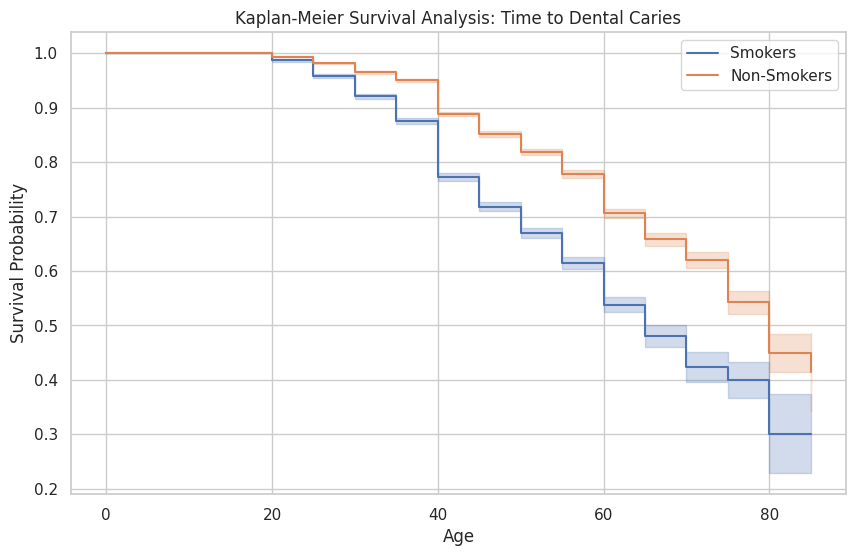

In [58]:
from lifelines import KaplanMeierFitter
import numpy as np
import matplotlib.pyplot as plt

# Create a survival analysis timeline using 'age' as time and 'dental caries' as the event
# Assuming 1 indicates the occurrence of dental caries
event_occurred = train_df['dental caries']
timeline = train_df['age']

# Kaplan-Meier Analysis for smokers
kmf_smokers = KaplanMeierFitter()
kmf_smokers.fit(timeline[train_df['smoking'] == 1], event_observed=event_occurred[train_df['smoking'] == 1], label="Smokers")

# Kaplan-Meier Analysis for non-smokers
kmf_non_smokers = KaplanMeierFitter()
kmf_non_smokers.fit(timeline[train_df['smoking'] == 0], event_observed=event_occurred[train_df['smoking'] == 0], label="Non-Smokers")

# Plot survival curves
plt.figure(figsize=(10, 6))
kmf_smokers.plot_survival_function()
kmf_non_smokers.plot_survival_function()
plt.title("Kaplan-Meier Survival Analysis: Time to Dental Caries")
plt.xlabel("Age")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()


In [59]:
# 6. Cox Proportional Hazards Regression

<lifelines.CoxPHFitter: fitted with 38984 total observations, 30625 right-censored observations>
             duration col = 'age'
                event col = 'event_occurred'
      baseline estimation = breslow
   number of observations = 38984
number of events observed = 8359
   partial log-likelihood = -66267.99
         time fit was run = 2024-12-07 07:51:57 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
smoking        0.02      1.02      0.02           -0.03            0.07                0.97                1.07
height(cm)     0.05      1.06      0.00            0.05            0.06                1.05                1.06
dental caries 21.88  3.19e+09    265.44         -498.37          542.13                0.00           2.79e+235

               cmp to     z      p  -log2(p)
covariate                                   
smoking          0.00  0.82   0.41      1.28
height(cm)       0.00 37.55 <0.005   1022.49
dental caries    0.00  0.08   0.93      0.10
---
Concordance = 0.95
Partial AIC = 132541.97
log-likelihood ratio test = 32667.01 on 3 df
-log2(p) of ll-ratio test = inf

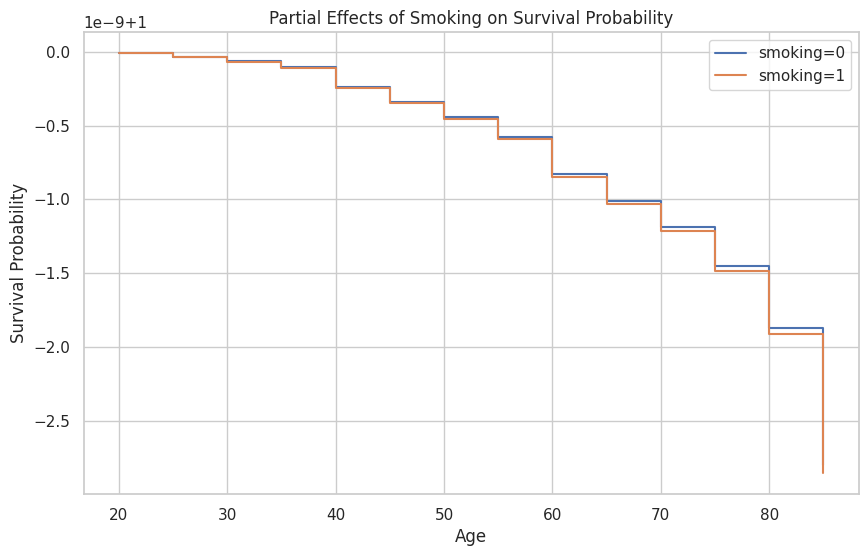

In [60]:
from lifelines import CoxPHFitter

# Prepare the data for Cox regression
cox_data = train_df[['age', 'smoking', 'height(cm)', 'dental caries']].copy()
cox_data['event_occurred'] = cox_data['dental caries']  # Binary outcome variable (0 or 1)

# Fit Cox Proportional Hazards model
cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='age', event_col='event_occurred')
cox_model.print_summary()

# Visualize the partial effects of smoking on survival
cox_model.plot_partial_effects_on_outcome(
    covariates='smoking',
    values=[0, 1],  # Compare non-smokers (0) and smokers (1)
    plot_baseline=False,
    figsize=(10, 6)
)

plt.title("Partial Effects of Smoking on Survival Probability")
plt.xlabel("Age")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()


In [61]:
# 7. ROC Curve and AUC

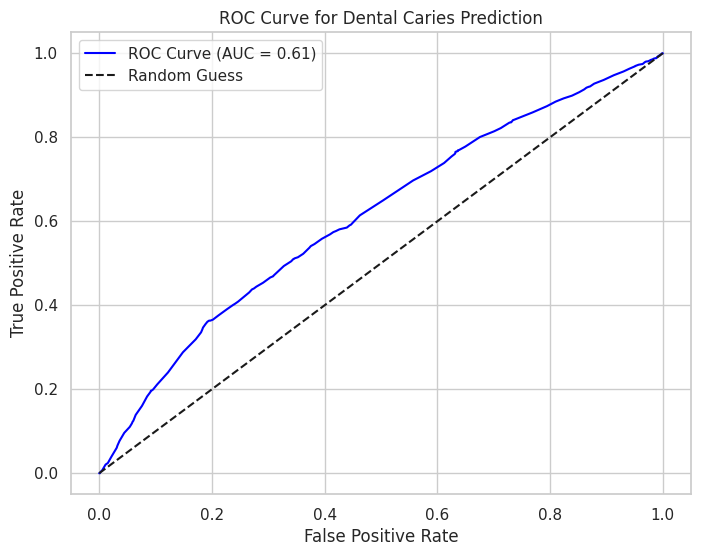

In [62]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define predictor variables (independent features) and target variable
X = train_df[['smoking', 'age', 'height(cm)']]
y = train_df['dental caries']  # Binary classification (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Dental Caries Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [63]:
import pandas as pd
from scipy import stats

# Assuming train_data is the correct DataFrame

# Subset the data for smokers and non-smokers based on the 'smoking' column
non_smokers_dental_caries = train_data[train_data['smoking'] == 0]['dental caries']
smokers_dental_caries = train_data[train_data['smoking'] == 1]['dental caries']

# STEP 1: Setup Hypotheses
# Null Hypothesis (H0): The data is normally distributed
# Alternative Hypothesis (Ha): The data is not normally distributed

# Perform the Shapiro-Wilk test for normality
non_smokers_test_stat, non_smokers_p_val = stats.shapiro(non_smokers_dental_caries)
smokers_test_stat, smokers_p_val = stats.shapiro(smokers_dental_caries)

# Display the results
print(f"Test Statistics for Non-Smokers' dental caries: {non_smokers_test_stat} and P-Value for Non-Smokers: {non_smokers_p_val}")
print(f"Test Statistics for Smokers' dental caries: {smokers_test_stat} and P-Value for Smokers: {smokers_p_val}")

# STEP 2: Compare p-value with significance level
alpha = 0.05  # significance level

if non_smokers_p_val < alpha:
    print("Reject Null Hypothesis (H0): Non-smokers' dental caries data is not normally distributed.")
else:
    print("Fail to reject Null Hypothesis (H0): Non-smokers' dental caries data is normally distributed.")

if smokers_p_val < alpha:
    print("Reject Null Hypothesis (H0): Smokers' dental caries data is not normally distributed.")
else:
    print("Fail to reject Null Hypothesis (H0): Smokers' dental caries data is normally distributed.")


Test Statistics for Non-Smokers' dental caries: 0.46743831237991196 and P-Value for Non-Smokers: 7.62053400359314e-124
Test Statistics for Smokers' dental caries: 0.5564781621563537 and P-Value for Smokers: 4.364315167961715e-104
Reject Null Hypothesis (H0): Non-smokers' dental caries data is not normally distributed.
Reject Null Hypothesis (H0): Smokers' dental caries data is not normally distributed.


In [65]:
train_df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [70]:
# Splitting data into groups based on smoking status
non_smokers = train_df[train_df['smoking'] == 0]['dental caries']
smokers = train_df[train_df['smoking'] == 1]['dental caries']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(non_smokers, smokers, equal_var=False)  # Welch's t-test

t_stat, p_value

(-20.56308098649031, 3.1376927666437743e-93)

The null hypothesis is that there is no difference in the mean dental caries levels between smokers and non-smokers. The t-test result, with a very small p-value (
𝑝
<
0.001
p<0.001), provides strong evidence to reject the null hypothesis. This means there is a significant difference in dental caries levels between smokers and non-smokers.

In [69]:
from scipy.stats import norm
# Means and standard deviations
mean_smokers = smokers.mean()
mean_non_smokers = non_smokers.mean()
std_smokers = smokers.std()
std_non_smokers = non_smokers.std()

# Sample sizes
n_smokers = len(smokers)
n_non_smokers = len(non_smokers)

# Z-test calculation
z_score = (mean_smokers - mean_non_smokers) / np.sqrt((std_smokers**2 / n_smokers) + (std_non_smokers**2 / n_non_smokers))

# P-value from z-distribution
p_value = 2 * (1 - norm.cdf(abs(z_score)))

z_score, p_value

(20.56308098649031, 0.0)